## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path
path = r'D:\ドキュメント\Study\CareerFoundry\Achievement 6'

In [4]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','vehicle loan customer_cleansed.csv'), index_col = False)

## 2. Cleanning

In [5]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT            

In [6]:
# Cheack duplicate

dups = df.duplicated()

In [7]:
dups.shape

(233154,)

In [8]:
# creat data frame with only defaulted customers

defaulter = df[df['loan_default']==True]

##### Extreme values checks

C:\Users\kenta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='asset_cost', ylabel='Density'>

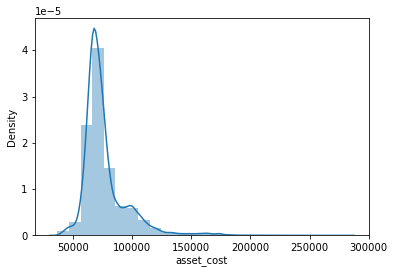

In [9]:
sns.distplot(defaulter['asset_cost'], bins=25) # Shows extreme values

In [10]:
defaulter['asset_cost'].mean() # Check the mean

76378.17666120014

In [11]:
defaulter['asset_cost'].median() # Check the median

71326.0

In [12]:
defaulter['asset_cost'].max() # Check the max

281164

## 3. Wrangling

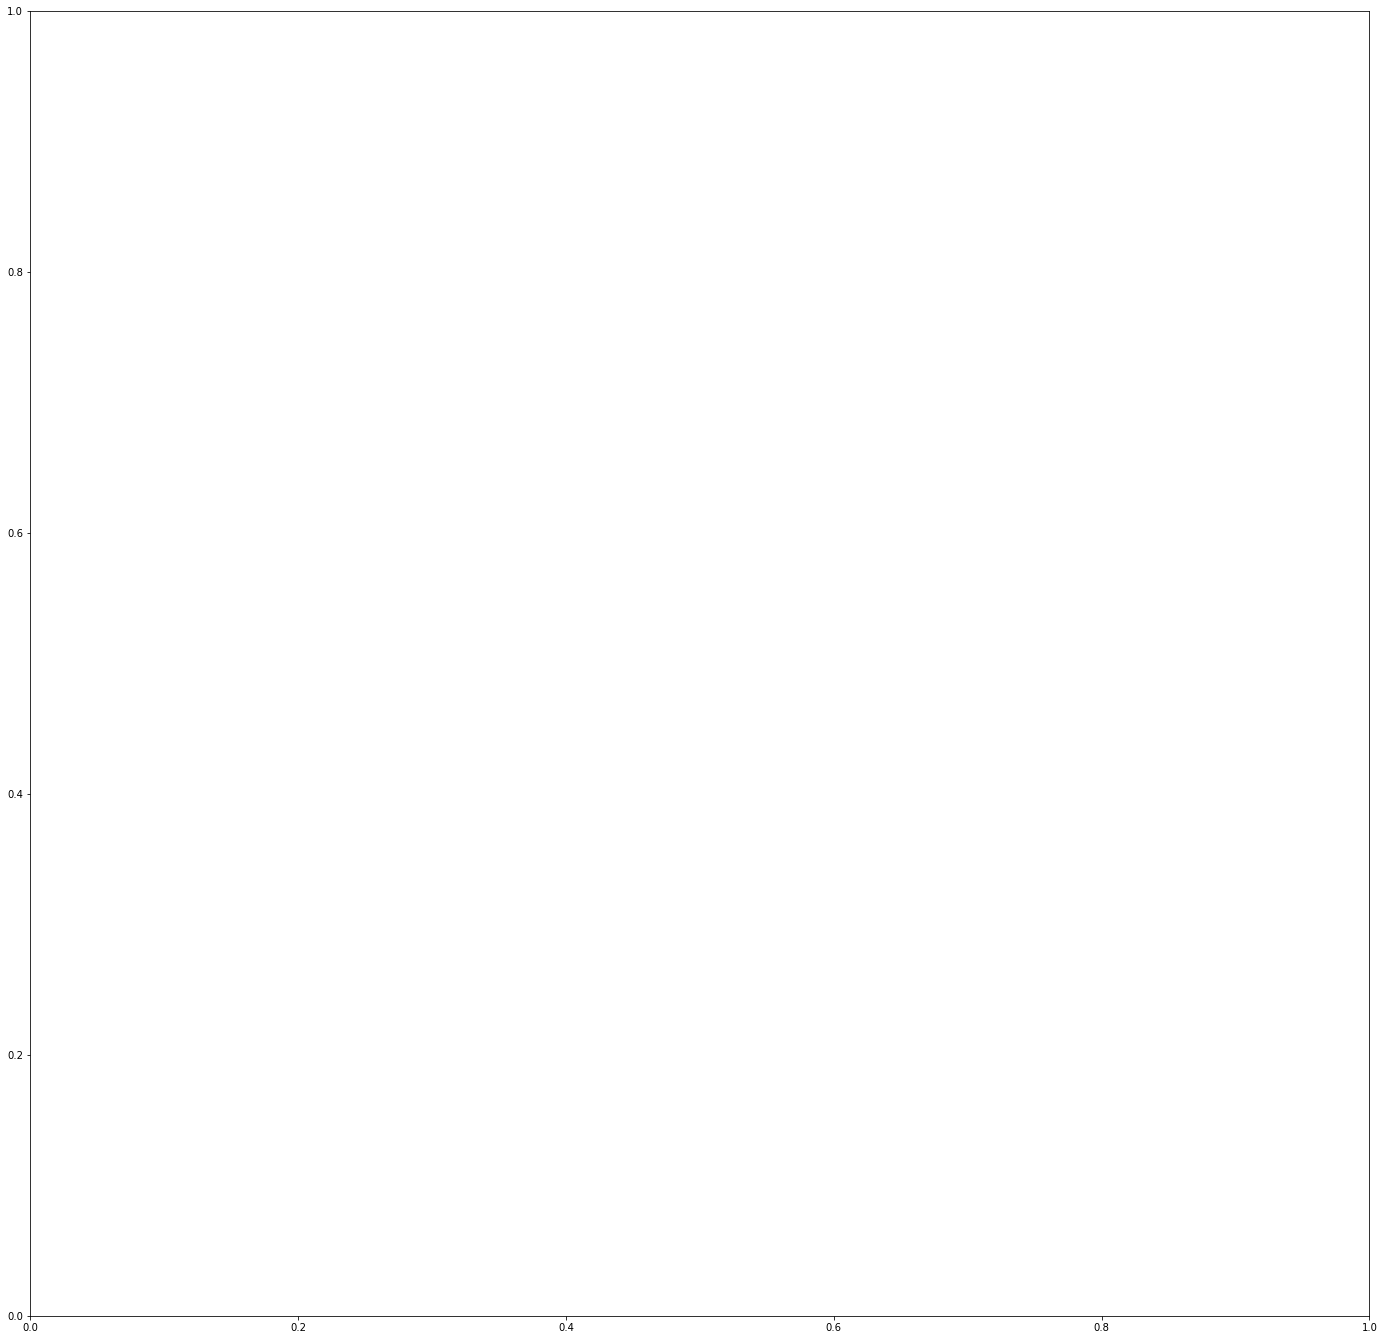

In [13]:
# Create a subplot with matplotlib.

f,ax = plt.subplots(figsize=(24,24))

In [14]:
# Create a subset excluding the "Date" and "No" columns

sub = defaulter[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default']]

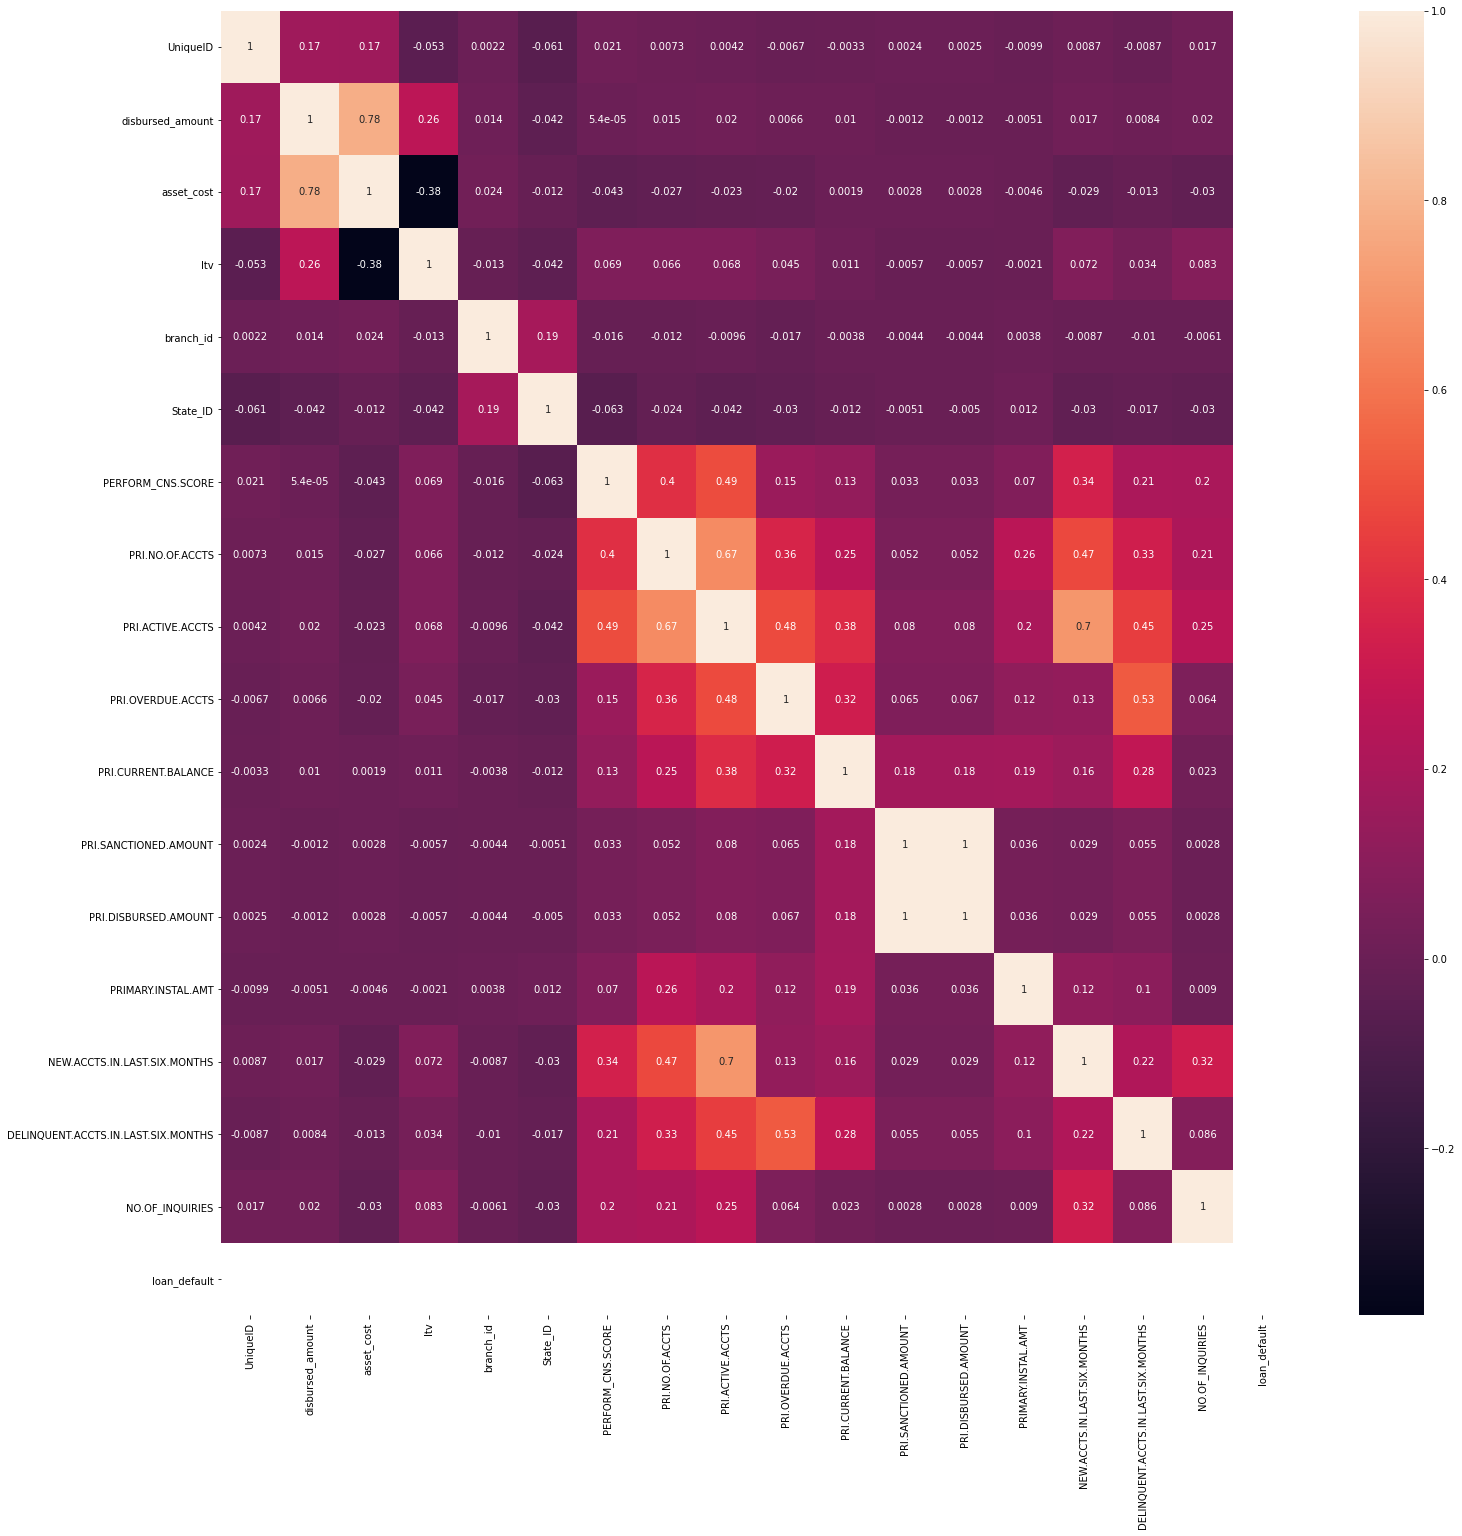

In [15]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr.figure

# State hypothesis 
### Disbursed amount will increase as increase of asset cost

### 3. Data prep for regression analysis 

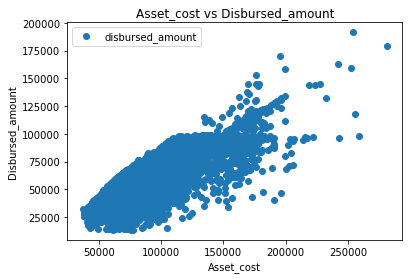

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

defaulter.plot(x = 'asset_cost', y='disbursed_amount',style='o')
plt.title('Asset_cost vs Disbursed_amount')  
plt.xlabel('Asset_cost')  
plt.ylabel('Disbursed_amount')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = defaulter['asset_cost'].values.reshape(-1,1)
y = defaulter['disbursed_amount'].values.reshape(-1,1)

In [34]:
X

array([[65550],
       [66113],
       [60300],
       ...,
       [74759],
       [68027],
       [73914]], dtype=int64)

In [35]:
y

array([[47145],
       [57513],
       [52378],
       ...,
       [57513],
       [47849],
       [57259]], dtype=int64)

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [37]:
# Create a regression object.

regression = LinearRegression() 

In [38]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

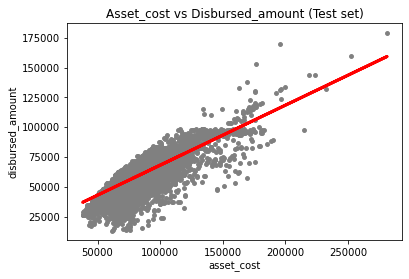

In [40]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Asset_cost vs Disbursed_amount (Test set)')
plot_test.xlabel('asset_cost')
plot_test.ylabel('disbursed_amount')
plot_test.show()

The line appears clearly from left down to right up.

In [41]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.50297215]]
Mean squared error:  58912649.51322565
R2 score:  0.6140061714071766


In [43]:
y_predicted

array([[77663.17673566],
       [77214.02260671],
       [46321.47322236],
       ...,
       [55837.70627922],
       [51157.04746172],
       [57270.17095923]])

In [44]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,81833,77663.176736
1,82686,77214.022607
2,35939,46321.473222
3,81586,80855.540965
4,50877,54345.387913
5,45349,47526.091519
6,51223,49927.280558
7,50000,50883.430613
8,49978,48304.692405
9,75843,97324.861008


There is a slight discrepancy between Actual and predict.

In the real world, the purchaser of a product with a high asset value has a large income from the borrower, so the disbursed_amount tends to be high naturally.

In [17]:
over200 = defaulter[defaulter['PERFORM_CNS.SCORE']>200]

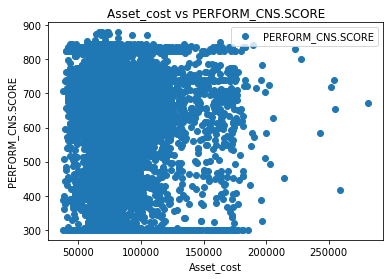

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

over200.plot(x = 'asset_cost', y='PERFORM_CNS.SCORE',style='o')
plt.title('Asset_cost vs PERFORM_CNS.SCORE')  
plt.xlabel('Asset_cost')  
plt.ylabel('PERFORM_CNS.SCORE')  
plt.show()

In [19]:
X = over200['asset_cost'].values.reshape(-1,1)
y = over200['PERFORM_CNS.SCORE'].values.reshape(-1,1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
regression = LinearRegression() 

In [22]:
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
y_predicted = regression.predict(X_test)

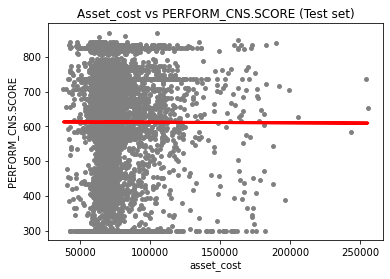

In [24]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Asset_cost vs PERFORM_CNS.SCORE (Test set)')
plot_test.xlabel('asset_cost')
plot_test.ylabel('PERFORM_CNS.SCORE')
plot_test.show()